### 1. Go to https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016 and download the data 

### 2. Use command line to rename the downloaded file to suicide_rates.csv, then move the file to your repository 
`use 'mv' `

### 3. Load the data into a pandas dataframe

### 4. Pick only rows where country starts with 'U' 

`use apply and lambda`

### 5. Get the names of unique countries left - `use .unique()`

##### [Thoughts]: how would that be useful if we have duplicated values in a dataset? 

### 6. Pick only rows with 'United States' (without using apply or lambda - try using indexing)

### 6. Group by age column and sum # suicides

### 7. Change the age column to a categorical one 
`use astype`

### 8. Re-order the categories so that 5-14 years appears first 

`use cat.reorder_categories`

### 9. Draw a barplot of # suicides(y) per age-group (x) for 2015

### 10. Save the plot to the visualization folder we have created

### 11. Push all to your git branch.



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [5]:
df = pd.read_csv('master.csv')

In [6]:
df.head(2)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent


In [8]:
uCountries = df.loc[df.country.str.startswith('U')]

In [9]:
uCountries.country.unique()

array(['Ukraine', 'United Arab Emirates', 'United Kingdom',
       'United States', 'Uruguay', 'Uzbekistan'], dtype=object)

In [19]:
us = uCountries.loc[uCountries.country == 'United States'].copy()

In [20]:
us.groupby('age').suicides_no.sum()

age
15-24 years    141679
25-34 years    182047
35-54 years    380917
5-14 years       8923
55-74 years    224770
75+ years       95677
Name: suicides_no, dtype: int64

In [21]:
us.loc[:, 'age'] = us.age.astype('category')

In [36]:
us.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
26848,United States,1985,male,75+ years,2177,4064000,53.57,United States1985,0.841,"4,346,734,000,000",19693,G.I. Generation
26849,United States,1985,male,55-74 years,5302,17971000,29.50,United States1985,0.841,"4,346,734,000,000",19693,G.I. Generation
26850,United States,1985,male,25-34 years,5134,20986000,24.46,United States1985,0.841,"4,346,734,000,000",19693,Boomers
26851,United States,1985,male,35-54 years,6053,26589000,22.77,United States1985,0.841,"4,346,734,000,000",19693,Silent
26852,United States,1985,male,15-24 years,4267,19962000,21.38,United States1985,0.841,"4,346,734,000,000",19693,Generation X


In [32]:
age_order = ['5-14 years', '15-24 years', '25-34 years','35-54 years', '55-74 years', '75+ years']

In [39]:
us.age = us.age.cat.reorder_categories(age_order, ordered=True)

In [42]:
us.sort_values('age', inplace=True)

In [46]:
us.loc[(us.year == 2015) & (us.age == '5-14 years')]

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
27219,United States,2015,female,5-14 years,158,20342901,0.78,United States2015,NaN,"18,120,714,000,000",60387,Generation Z
27218,United States,2015,male,5-14 years,255,21273987,1.20,United States2015,NaN,"18,120,714,000,000",60387,Generation Z


In [54]:
group_age = us.groupby('age').sum().reset_index()

<IPython.core.display.Javascript object>


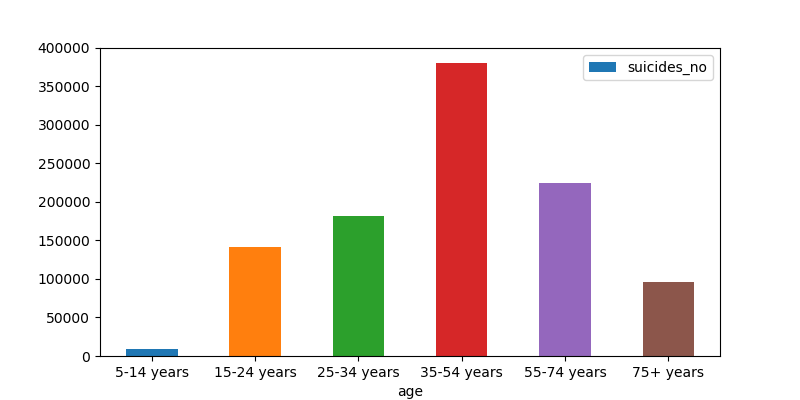

In [66]:
group_age.plot.bar('age', 'suicides_no', figsize=(8, 4), rot=0);
plt.savefig('suicides_no.png')

In [67]:
!ls -altr

total 5536
-rwxrwxrwx@  1 flatironschool  staff  2706377 Dec  1  2018 master.csv
drwxr-xr-x  12 flatironschool  staff      384 Jul 26 08:51 ..
-rw-r--r--   1 flatironschool  staff      993 Jul 26 08:51 2_5_apply_lambda_gb_plt.md
drwxr-xr-x   3 flatironschool  staff       96 Jul 26 08:52 .ipynb_checkpoints
-rw-r--r--   1 flatironschool  staff    96980 Jul 26 11:05 day8_warmup.ipynb
drwxr-xr-x   7 flatironschool  staff      224 Jul 26 11:06 .
-rw-r--r--   1 flatironschool  staff    20577 Jul 26 11:06 suicides_no.png
